**Dataset used :**http//vision.stanford.edu/aditya86/ImageNetDogs/

In [ ]:
!wget http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar

--2024-02-13 10:32:18--  http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar
Resolving vision.stanford.edu (vision.stanford.edu)... 171.64.68.10
Connecting to vision.stanford.edu (vision.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 793579520 (757M) [application/x-tar]
Saving to: ‘images.tar’

images.tar          100%[===================>] 756.82M  28.8MB/s    in 19s     

2024-02-13 10:32:37 (40.7 MB/s) - ‘images.tar’ saved [793579520/793579520]



In [ ]:
!tar -xf images.tar

In [ ]:
!rm -rf images.tar

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders
Images_path = '/content/Images'
Images_splitted = "Standford_dog_data"
splitfolders.ratio(Images_path, output=Images_splitted,
        seed=42, ratio=(0.80, 0.15, 0.05), group_prefix=None, move=False)

Copying files: 20580 files [00:05, 3580.93 files/s]


In [ ]:
import glob
Total_train_data = glob.glob(Images_splitted+'/train/*/*.jpg')
Total_val_data = glob.glob(Images_splitted+'/val/*/*.jpg')
Total_test_data = glob.glob(Images_splitted+'/test/*/*.jpg')
print(f'Total images for Training {len(Total_train_data)},\nTotal images for Validation : {len(Total_val_data)},\nTotal images for Testing : {len(Total_test_data)} ')

Total images for Training 16418,
Total images for Validation : 3025,
Total images for Testing : 1137 


In [ ]:
import os
Standford_dog_data = '/content/Standford_dog_data'
for dir_path, dir_name, file_name in os.walk(Standford_dog_data):
    #print(f_p.split('\\'))
    print(dir_path.split('Standford_dog_data')[-1], len(file_name))

 0
/train 0
/train/n02109525-Saint_Bernard 136
/train/n02098105-soft-coated_wheaten_terrier 124
/train/n02090622-borzoi 120
/train/n02086079-Pekinese 119
/train/n02097130-giant_schnauzer 125
/train/n02096294-Australian_terrier 156
/train/n02097658-silky_terrier 146
/train/n02089078-black-and-tan_coonhound 127
/train/n02089867-Walker_hound 122
/train/n02099429-curly-coated_retriever 120
/train/n02100735-English_setter 128
/train/n02090721-Irish_wolfhound 174
/train/n02090379-redbone 118
/train/n02098286-West_Highland_white_terrier 135
/train/n02105641-Old_English_sheepdog 135
/train/n02107908-Appenzeller 120
/train/n02104029-kuvasz 120
/train/n02097298-Scotch_terrier 126
/train/n02102177-Welsh_springer_spaniel 120
/train/n02112137-chow 156
/train/n02093647-Bedlington_terrier 145
/train/n02094433-Yorkshire_terrier 131
/train/n02097209-standard_schnauzer 124
/train/n02108915-French_bulldog 127
/train/n02107683-Bernese_mountain_dog 174
/train/n02111500-Great_Pyrenees 170
/train/n02109047-G

Class names: n02093256-Staffordshire_bullterrier
Image height 480, Image width 360


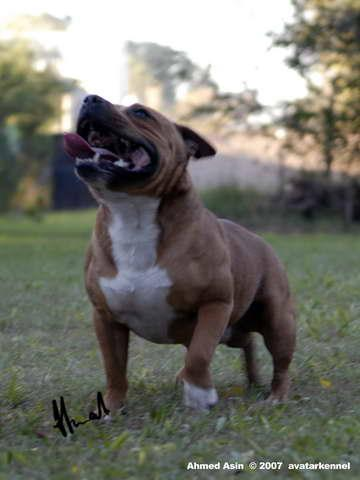

In [ ]:
import glob
import random
from PIL import Image
import matplotlib.pyplot as plt

Standford_dog_data = '/content/Standford_dog_data'

global_path = glob.glob(Standford_dog_data+'/train/*/*.jpg')

image = random.choice(global_path)
#print(image.split('/'))
class_name =image.split('/')[-2]
img = Image.open(image)
print(f'Class names: {class_name}')
print(f'Image height {img.height}, Image width {img.width}')
img


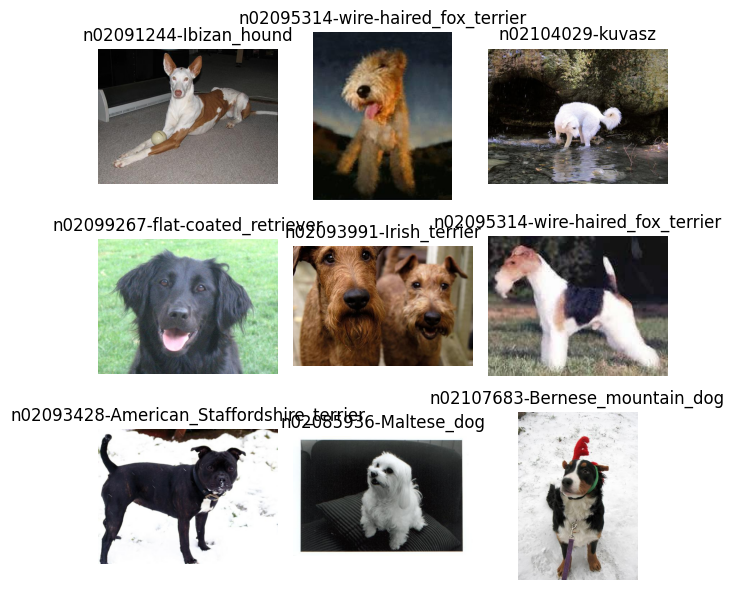

In [ ]:

import os
import glob
import random
from PIL import Image
import matplotlib.pyplot as plt

Standford_dog_data = '/content/Standford_dog_data'

global_path = glob.glob(Standford_dog_data+'/*/*/*.jpg')

random_paths = random.choices(global_path, k=9)

# Create a new figure
plt.figure(figsize=(6, 6))

# Plot the images
for i, image_file in enumerate(random_paths[:9]):
    #print(image_file)

    image = Image.open(image_file)

    # Add subplot with 3 rows, 3 columns, and i+1 index
    plt.subplot(3, 3, i + 1)

    # Plot the image
    plt.imshow(image)
    plt.title(image_file.split('/')[-2])  # Set the title as the file name
    plt.axis('off')  # Turn off axis labels

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
import torch
import torchvision
from torchvision.datasets import ImageFolder

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
from torchvision import transforms
transforms = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor()
])

In [ ]:
train_dir = Standford_dog_data +'/train'
val_dir = Standford_dog_data +'/val'
test_dir = Standford_dog_data +'/test'

train_dir_ = ImageFolder(train_dir, transform=transforms)
val_dir_ = ImageFolder(val_dir, transform=transforms)
test_dir_ = ImageFolder(test_dir, transform=transforms)

In [ ]:
import os
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dir_,batch_size=32, shuffle=True, num_workers=os.cpu_count())
val_dataloader = DataLoader(val_dir_,batch_size=32, shuffle=False, num_workers=os.cpu_count())
test_dataloader = DataLoader(test_dir_,batch_size=32, shuffle=False, num_workers=os.cpu_count())
train_dataloader, val_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7ab97c592800>,
 <torch.utils.data.dataloader.DataLoader at 0x7ab97c592fb0>)

In [ ]:
print(f'Total number of images in train_loader: {len(Total_train_data)} and Total number of batches: {len(train_dataloader)}')
print(f'Total number of images in val_loader: {len(Total_val_data)} and Total number of batches: {len(val_dataloader)}')
print(f'Total number of images in test_dir: {len(Total_test_data)}and Eval batches:{len(test_dataloader)}')

Total number of images in train_loader: 16418 and Total number of batches: 514
Total number of images in val_loader: 3025 and Total number of batches: 95
Total number of images in test_dir: 1137and Eval batches:36


In [ ]:
images, labels = next(iter(train_dataloader))
img = images[0]
print(f'Image shape {images.shape}, Label size {labels.shape}')

Image shape torch.Size([32, 3, 224, 224]), Label size torch.Size([32])


In [ ]:
class_names = train_dir_.classes
class_names[:3]

['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog']

In [ ]:

import torch
from torch import nn

class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)

        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.conv3 = nn.Conv2d(out_channels, out_channels * self.expansion, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(out_channels * self.expansion)
        self.relu = nn.ReLU(inplace=True)

        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        identity = x
        #print(f'identity:{identity.shape}')

        out = self.conv1(x)
        #print(out.shape)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        #print(out.shape)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        #print(out.shape)
        out = self.bn3(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out


In [ ]:
import torch.nn.init as init

OUT_FEATURES = len(class_names)

class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes = 10):
        super().__init__()
        self.in_filters = 64

        self.conv1 = nn.Sequential(
                        nn.Conv2d(3, 64, kernel_size = 7, stride = 2, padding = 3),
                        nn.BatchNorm2d(64),
                        nn.ReLU())
        self.maxpool = nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1)
        self.layer1 = self._make_layer(block, 64, layers[0], stride = 1)
        self.layer2 = self._make_layer(block, 128, layers[1], stride = 2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride = 2)
        self.layer4 = self._make_layer(block, 512, layers[3], stride = 2)
        self.adavgpool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(512*block.expansion, num_classes)



    def _make_layer(self, block, out_filters, blocks, stride=1):
        downsample = None
        if stride != 1 or self.in_filters != out_filters*block.expansion:

            downsample = nn.Sequential(
                nn.Conv2d(self.in_filters, out_filters* block.expansion, kernel_size=1, stride=stride),
                nn.BatchNorm2d(out_filters* block.expansion),
            )
        layers = []
        layers.append(block(self.in_filters, out_filters, stride, downsample))
        self.in_filters = out_filters* block.expansion
        for i in range(1, blocks):
            layers.append(block(self.in_filters, out_filters))

        return nn.Sequential(*layers)


    def forward(self, x):
        x = self.conv1(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.adavgpool(x)
        x = torch.flatten(x, 1) #x.view(x.size(0), -1)
        x = self.fc(x)

        return x

In [ ]:
torch.manual_seed(42)
OUT_FEATURES = len(class_names)
resnet50_model = ResNet(Bottleneck, [3, 4, 6, 3], num_classes=OUT_FEATURES)
resnet50_model = resnet50_model.to(device)
#resnet50_model

In [ ]:
# import torch
# rand_image = torch.rand(1,3,224,224)
# print(rand_image.shape)
# resnet50_model(rand_image.to(device))

In [ ]:
next(resnet50_model.parameters()).device

device(type='cuda', index=0)

In [ ]:
# import torch
# import torchvision
# from torch import nn
# from torchvision.models import ResNet50_Weights, resnet50, ResNet18_Weights, resnet18
# w = ResNet50_Weights.DEFAULT
# resnet50_pretrained = resnet50(weights=w)
# resnet50_pretrained
# # w = ResNet18_Weights.DEFAULT
# # resnet18_pretrained = resnet18(weights=w)
# # resnet18_pretrained

### Model default weights

In [ ]:
##resnet18_model.state_dict()
#
for name, module in resnet50_model.named_modules():
    if isinstance(module, torch.nn.Conv2d):
        first_conv_layer_weights = module.weight
        print(first_conv_layer_weights)
        break

Parameter containing:
tensor([[[[ 0.0631,  0.0685, -0.0193,  ..., -0.0181,  0.0166, -0.0402],
          [ 0.0484,  0.0727, -0.0605,  ...,  0.0154,  0.0609,  0.0112],
          [ 0.0398, -0.0116,  0.0636,  ..., -0.0385,  0.0210, -0.0380],
          ...,
          [ 0.0078, -0.0815,  0.0745,  ...,  0.0637,  0.0137, -0.0268],
          [ 0.0510,  0.0129,  0.0666,  ..., -0.0260,  0.0222, -0.0224],
          [ 0.0347,  0.0736,  0.0477,  ...,  0.0476,  0.0148,  0.0419]],

         [[-0.0503, -0.0816, -0.0319,  ...,  0.0677,  0.0238,  0.0342],
          [ 0.0261, -0.0014,  0.0645,  ...,  0.0052, -0.0563,  0.0254],
          [-0.0284,  0.0253, -0.0172,  ..., -0.0489, -0.0492, -0.0492],
          ...,
          [ 0.0334,  0.0295,  0.0685,  ..., -0.0562,  0.0438, -0.0333],
          [ 0.0501, -0.0196,  0.0472,  ..., -0.0416,  0.0251,  0.0174],
          [-0.0210,  0.0492,  0.0561,  ..., -0.0440,  0.0755, -0.0278]],

         [[-0.0292, -0.0798, -0.0472,  ..., -0.0109, -0.0599,  0.0019],
        

### Initializing model weights

In [ ]:
from torch.nn import init
def weight_initializer(resnet50_model):
    if isinstance(resnet50_model, nn.Conv2d):
        torch.nn.init.kaiming_uniform_(resnet50_model.weight, nonlinearity='relu')
        #torch.nn.init.constant_(resnet50_model.bias, 0)
resnet50_model.apply(weight_initializer)

ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
for name, param in resnet50_model.named_parameters():
  print(name, param)
  break


conv1.0.weight Parameter containing:
tensor([[[[ 4.5643e-02, -1.9797e-01, -4.1047e-02,  ..., -1.3889e-01,
           -7.0819e-03,  9.5458e-02],
          [-3.7989e-02,  7.6366e-03, -8.6182e-02,  ...,  1.7085e-01,
            1.3331e-01, -1.8822e-01],
          [-4.5298e-02, -1.6874e-01,  1.1079e-01,  ...,  5.5902e-03,
           -1.1846e-01, -1.9905e-01],
          ...,
          [ 1.7500e-01, -4.8185e-02, -1.8148e-01,  ...,  6.0391e-02,
           -9.3950e-02, -1.3201e-01],
          [ 1.4404e-01, -9.0455e-02, -1.1747e-01,  ...,  1.0914e-01,
            4.4443e-02, -6.2881e-02],
          [ 1.9605e-01, -1.2456e-02,  1.6984e-01,  ..., -1.5954e-01,
            1.2681e-01, -1.5791e-01]],

         [[ 4.4423e-02, -1.3130e-01,  1.3764e-01,  ...,  9.2404e-02,
           -9.9374e-02, -1.3467e-01],
          [ 9.1725e-02, -4.0934e-02, -9.3104e-02,  ..., -3.5995e-02,
           -1.4245e-01, -1.9280e-01],
          [-1.0784e-01, -1.0916e-01, -4.1060e-02,  ..., -7.5875e-02,
            4.9299e-0

In [ ]:
param_size = 0
for param in resnet50_model.parameters():
    param_size += param.nelement() * param.element_size()

buffer_size = 0
for buffer in resnet50_model.buffers():
    buffer_size += buffer.nelement() * buffer.element_size()

size_all_mb = (param_size + buffer_size) / 1024**2
print('model size: {:.3f}MB'.format(size_all_mb))


model size: 90.832MB


In [ ]:
!pip install -q torchinfo
from torchinfo import summary

In [ ]:
summary(model=resnet50_model,
       input_size=(32, 3, 224, 224),
       col_names=["input_size","output_size","trainable", 'num_params'],
       row_settings=["var_names"],
       col_width=10)

Layer (type (var_name))                  Input Shape Output Shape Trainable  Param #
ResNet (ResNet)                          [32, 3, 224, 224] [32, 120]  True       --
├─Sequential (conv1)                     [32, 3, 224, 224] [32, 64, 112, 112] True       --
│    └─Conv2d (0)                        [32, 3, 224, 224] [32, 64, 112, 112] True       9,472
│    └─BatchNorm2d (1)                   [32, 64, 112, 112] [32, 64, 112, 112] True       128
│    └─ReLU (2)                          [32, 64, 112, 112] [32, 64, 112, 112] --         --
├─MaxPool2d (maxpool)                    [32, 64, 112, 112] [32, 64, 56, 56] --         --
├─Sequential (layer1)                    [32, 64, 56, 56] [32, 256, 56, 56] True       --
│    └─Bottleneck (0)                    [32, 64, 56, 56] [32, 256, 56, 56] True       --
│    │    └─Conv2d (conv1)               [32, 64, 56, 56] [32, 64, 56, 56] True       4,096
│    │    └─BatchNorm2d (bn1)            [32, 64, 56, 56] [32, 64, 56, 56] True       128
│   

In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [ ]:

def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [ ]:
from tqdm.auto import tqdm
from pathlib import Path
# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          save_dir : str,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 10):


    # 2. Create empty results dictionary
    patience = 10
    best_val_loss = float('inf')
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    saved_models = Path(save_dir+'/')
    saved_models.mkdir(parents=True, exist_ok=True)

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
      train_loss, train_acc = train_step(model=model,
                                          dataloader=train_dataloader,
                                          loss_fn=loss_fn,
                                          optimizer=optimizer)
      test_loss, test_acc = test_step(model=model,
          dataloader=test_dataloader,
          loss_fn=loss_fn)

      #Adding lr schedular
      scheduler.step(test_loss)


        # 4. Print out what's happening
      print(
          f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f} | "
          f"Learning rare: {optimizer.param_groups[0]['lr']} |"
      )

      # 5. Update results dictionary
      results["train_loss"].append(train_loss)
      results["train_acc"].append(train_acc)
      results["test_loss"].append(test_loss)
      results["test_acc"].append(test_acc)

      # if (epoch + 1) % 5 == 0:

      #   checkpoint_path = f'{saved_models}/model_checkpoint_epoch_{epoch + 1}.pth'

      if test_loss < best_val_loss:
        best_val_loss = test_loss
        epochs_without_improvement = 0
        if (epoch + 1) % 1== 0:
          checkpoint_path = saved_models / f'model_checkpoint_epoch_{epoch + 1}.pth'
          torch.save(model.state_dict(), checkpoint_path)
          print(f'Model checkpoint saved at epoch {epoch + 1} with Test loss: {test_loss:.4f}')

      else:
        epochs_without_improvement += 1
        print(f'Epoch {epoch + 1}: Test loss did not improve.')

        # Check for early stopping
      if epochs_without_improvement >= patience:
        print(f'Early stopping after {epochs_without_improvement} epochs without improvement.')
        break


    # 6. Return the filled results at the end of the epochs
    return results

In [ ]:
# Set the random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#loss function
loss_fn = nn.CrossEntropyLoss()

#optimizer

optimizer = torch.optim.Adam(params=resnet50_model.parameters(), lr=0.001)#weight_decay=0.1
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor= 0.1, patience=5)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

results = train(model=resnet50_model,
            train_dataloader = train_dataloader,
            test_dataloader = val_dataloader,
            save_dir = 'saved_models',
            optimizer=optimizer,
            loss_fn=loss_fn,
            epochs=25)

end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 4.7523 | train_acc: 0.0141 | test_loss: 4.6143 | test_acc: 0.0174 | Learning rare: 0.001 |
Model checkpoint saved at epoch 1 with Test loss: 4.6143
Epoch: 2 | train_loss: 4.5519 | train_acc: 0.0261 | test_loss: 4.5587 | test_acc: 0.0309 | Learning rare: 0.001 |
Model checkpoint saved at epoch 2 with Test loss: 4.5587
Epoch: 3 | train_loss: 4.3866 | train_acc: 0.0399 | test_loss: 4.5103 | test_acc: 0.0331 | Learning rare: 0.001 |
Model checkpoint saved at epoch 3 with Test loss: 4.5103
Epoch: 4 | train_loss: 4.1968 | train_acc: 0.0592 | test_loss: 4.2220 | test_acc: 0.0615 | Learning rare: 0.001 |
Model checkpoint saved at epoch 4 with Test loss: 4.2220
Epoch: 5 | train_loss: 4.0227 | train_acc: 0.0744 | test_loss: 4.7709 | test_acc: 0.0309 | Learning rare: 0.001 |
Epoch 5: Test loss did not improve.
Epoch: 6 | train_loss: 4.0577 | train_acc: 0.0734 | test_loss: 3.9419 | test_acc: 0.0972 | Learning rare: 0.001 |
Model checkpoint saved at epoch 6 with Test loss: 3.

In [ ]:
len(class_names)

In [ ]:
OUT_FEATURES = len(class_names)
#load_model = create_Mobilenet_v3(OUT_FEATURES= OUT_FEATURES)#mobilenet_v3s#torchvision.models.mobilenet_v3_small(num_classes = 120)#

load_model = ResNet(Bottleneck, [3, 4, 6, 3], num_classes=OUT_FEATURES)
PATH = '/content/saved_models/model_checkpoint_epoch_15.pth'

load_model.load_state_dict(torch.load(PATH)) #map_location=torch.device('cpu')


<All keys matched successfully>

In [ ]:
loaded_model_params = sum(torch.numel(param) for param in load_model.parameters())
loaded_model_params

23757816

In [ ]:
param_size = 0
for param in load_model.parameters():
  #print(param.nelement(), param.element_size())
  param_size += param.nelement() * param.element_size()
buffer_size = 0
for buffer in load_model.buffers():
  buffer_size += buffer.nelement() * buffer.element_size()

size_all_mb = (param_size + buffer_size) / 1024**2
print('model size: {:.3f}MB'.format(size_all_mb))

model size: 90.832MB


In [ ]:
summary(model=load_model,
       input_size=(16, 3, 224, 224),
       col_names=["input_size","output_size","trainable", 'num_params'],
       row_settings=["var_names"],
       col_width=10)

Layer (type (var_name))                  Input Shape Output Shape Trainable  Param #
ResNet (ResNet)                          [16, 3, 224, 224] [16, 120]  True       --
├─Sequential (conv1)                     [16, 3, 224, 224] [16, 64, 112, 112] True       --
│    └─Conv2d (0)                        [16, 3, 224, 224] [16, 64, 112, 112] True       9,472
│    └─BatchNorm2d (1)                   [16, 64, 112, 112] [16, 64, 112, 112] True       128
│    └─ReLU (2)                          [16, 64, 112, 112] [16, 64, 112, 112] --         --
├─MaxPool2d (maxpool)                    [16, 64, 112, 112] [16, 64, 56, 56] --         --
├─Sequential (layer1)                    [16, 64, 56, 56] [16, 256, 56, 56] True       --
│    └─Bottleneck (0)                    [16, 64, 56, 56] [16, 256, 56, 56] True       --
│    │    └─Conv2d (conv1)               [16, 64, 56, 56] [16, 64, 56, 56] True       4,096
│    │    └─BatchNorm2d (bn1)            [16, 64, 56, 56] [16, 64, 56, 56] True       128
│   

In [ ]:
def plot_loss_curves(results):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    loss = results["train_loss"]
    test_loss = results["test_loss"]

    accuracy = results["train_acc"]
    test_accuracy = results["test_acc"]

    epochs = range(len(results["train_loss"]))

    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="train_accuracy")
    plt.plot(epochs, test_accuracy, label="test_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()


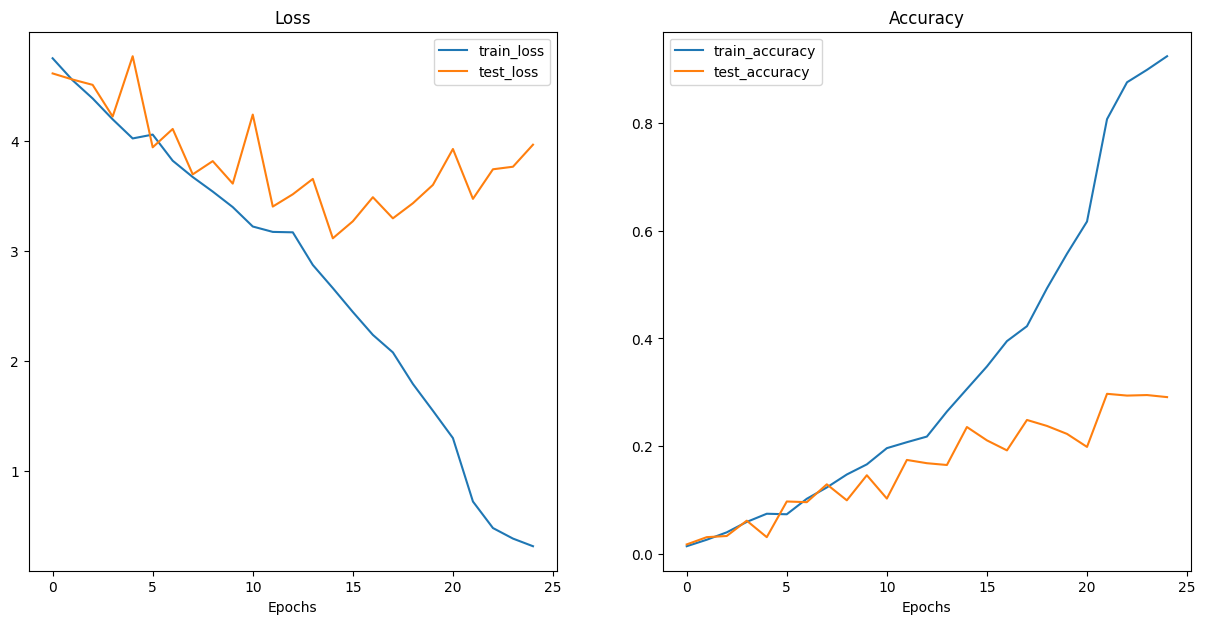

In [ ]:
plot_loss_curves(results)

In [ ]:
from typing import List, Tuple

from PIL import Image

# 1. Take in a trained model, class names, image path, image size, a transform and target device
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str],
                        transform: torchvision.transforms,
                        device: torch.device=device):

    img = Image.open(image_path)

    image_transform = transform

    model.to(device)

    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
      # 6. Transform and add an extra dimension to image (model requires samples in [batch_size, color_channels, height, width])
      transformed_image = image_transform(img).unsqueeze(dim=0)

      # 7. Make a prediction on image with an extra dimension and send it to the target device
      target_image_pred = model(transformed_image.to(device))

    # 8. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 9. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 10. Plot image with predicted label and probability
    plt.figure(figsize=(4,4))
    plt.imshow(img)
    plt.title(f"Pred: {class_names[target_image_pred_label]} | Prob: {target_image_pred_probs.max():.3f}")
    plt.axis(False);

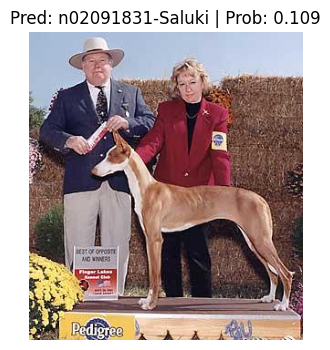

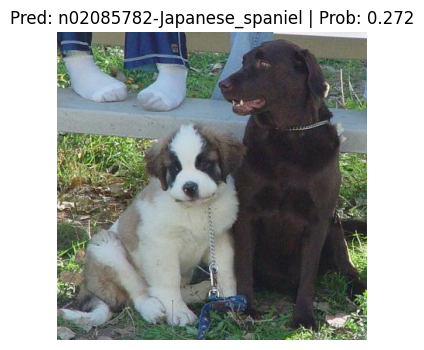

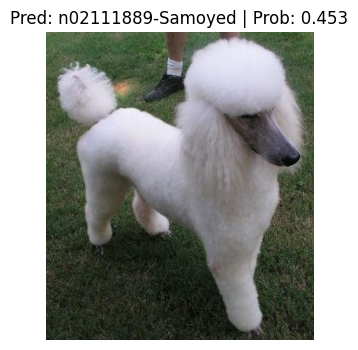

In [ ]:
# Get a random list of image paths from test set
import random
num_images_to_plot = 3
test_image_path_list = list(Path(test_dir).glob("*/*.jpg"))
test_image_path_sample = random.sample(population=test_image_path_list,
                                       k=num_images_to_plot)

# Make predictions on and plot the images
for image_path in test_image_path_sample:
    pred_and_plot_image(model=load_model,
                        image_path=image_path,
                        class_names=class_names,
                        transform=transforms)

In [ ]:
from PIL import Image
# Calculate accuracy (a classification metric)
from sklearn import metrics

def model_eval(model: torchvision.models, eval_dataloader, device: device):
    #print(Image)
    model.to(device)
    model.eval()
    with torch.inference_mode():
        correct = 0
        loss = 0
        true_labels = []
        pred_labels = []
        for i, (image, label) in enumerate(eval_dataloader):

          X, y = image.to(device), label.to(device)

          y_pred = model(X)

          #loss += loss_fn(y_pred, y)

          y_probs = torch.softmax(y_pred, dim=1)

          pred_class = torch.argmax(y_probs, dim=1)

          correct += (pred_class == y).sum().item()/len(y_pred)
          #print(i, "--",correct)
          true_labels.extend(y.tolist())
          pred_labels.extend(pred_class.tolist())

        acc = correct/ len(eval_dataloader)
        sklearn_acc = metrics.accuracy_score(true_labels, pred_labels)
        classification_report = metrics.classification_report(true_labels, pred_labels)


    return acc, sklearn_acc, len(true_labels), len(pred_labels), classification_report#, sklearn_metrics, classification_report

In [ ]:
acc, sklearn_acc, true_labels, pred_labels, classification_report  = model_eval(load_model, test_dataloader, device )
print(f'Torch acc:{acc}, Sklearn acc:{sklearn_acc}, len of true labels: {true_labels}, len of pred labels:{pred_labels} classification report:\n{classification_report}')

Torch acc:0.22737949346405228, Sklearn acc:0.2233948988566403, len of true labels: 1137, len of pred labels:1137 classification report:
              precision    recall  f1-score   support

           0       0.17      0.22      0.19         9
           1       0.54      0.70      0.61        10
           2       0.12      0.07      0.09        14
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        11
           5       0.33      0.10      0.15        10
           6       0.38      0.27      0.32        11
           7       0.33      0.20      0.25        10
           8       0.30      0.70      0.42        10
           9       0.19      0.23      0.21        13
          10       0.00      0.00      0.00         9
          11       0.20      0.10      0.13        10
          12       0.00      0.00      0.00        10
          13       0.29      0.20      0.24        10
          14       0.00      0.00      0.00         9

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
device